# Google Data Analytics Professional Bike Share Case Study

## Ask
### Business Task
Analyse non-Bellabeat smart device data and compare with one Bellabeat product to discover insights to help guide marketing strategies for the company

### Key questions
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## Prepare
### Limitations
1. The sample size is small as only 30 individuals were considered.
2. The data is about six years old; the FitBit devices have likely evolved to deliver more accurate results.
3. Since the data was collected through a survey, the results may not be accurate as such participants may not provide honest and accurate answers.
4. Data pertaining to weight only has information from eight users. Furthermore, most entries in one of the fields are blank and about two-thirds of the weight entries were manually entered.

In [1]:
# Import the tidyverse library and read in the data files
library(tidyverse)
require(forcats)
library(openxlsx)
library(ggplot2)

# Load and verify that the data was loaded successfully
activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

head(activity)
head(sleep)
head(weight)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ───────────────────────────────────────────────────────

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


## Process
### Verification and Cleaning

In [2]:
# Change the data type of the Id column to character
# Alter the names of ActivityDate, SleepDay, and Date columns to date format
library(dplyr)

# Assuming activity, sleep, and weight are already loaded

# Convert and rename in activity
activity <- activity %>%
  mutate(Id = as.character(Id), 
         Day = as.Date(ActivityDate, format = "%m/%d/%y")) %>%
  select(-ActivityDate) # Removes the original ActivityDate column

# Convert and rename in sleep
sleep <- sleep %>%
  mutate(Id = as.character(Id), 
         Day = as.Date(SleepDay, format = "%m/%d/%y")) %>%
  select(-SleepDay) # Removes the original SleepDay column

# Convert and rename in weight
weight <- weight %>%
  mutate(Id = as.character(Id), LogId = as.character(LogId),
         Day = as.Date(Date, format = "%m/%d/%y")) %>%
  select(-Date) # Removes the original Date column

# Ensure 'Day' is of type Date in all data frames
activity$Day <- as.Date(activity$Day)
sleep$Day <- as.Date(sleep$Day)
weight$Day <- as.Date(weight$Day)

# Merge datasets
combined_data <- sleep %>%
  right_join(activity, by = c("Id","Day")) %>%
  left_join(weight, by = c("Id", "Day")) %>%
  mutate(Weekday = weekdays(Day))


# Eliminate duplicate entries, and tally both missing values and unique Ids
combined_data <- combined_data[!duplicated(combined_data), ]
sum(is.na(combined_data))
n_distinct(combined_data$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 6893

[1] 33

[1] 24

[1] 8

## Analyse

In [3]:
# Order the days of the week
combined_data$Weekday <- factor(combined_data$Weekday, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

In [4]:
# Select summary statistics 
combined_data %>%
  select(TotalMinutesAsleep, TotalSteps, TotalDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories, WeightKg, Fat, BMI, IsManualReport) %>%
  summary()

 TotalMinutesAsleep   TotalSteps    TotalDistance    VeryActiveMinutes
 Min.   : 58.0      Min.   :    0   Min.   : 0.000   Min.   :  0.00   
 1st Qu.:361.0      1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:  0.00   
 Median :432.5      Median : 7406   Median : 5.245   Median :  4.00   
 Mean   :419.2      Mean   : 7638   Mean   : 5.490   Mean   : 21.16   
 3rd Qu.:490.0      3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 32.00   
 Max.   :796.0      Max.   :36019   Max.   :28.030   Max.   :210.00   
 NA's   :530                                                          
 FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes    Calories   
 Min.   :  0.00      Min.   :  0.0        Min.   :   0.0   Min.   :   0  
 1st Qu.:  0.00      1st Qu.:127.0        1st Qu.: 729.8   1st Qu.:1828  
 Median :  6.00      Median :199.0        Median :1057.5   Median :2134  
 Mean   : 13.56      Mean   :192.8        Mean   : 991.2   Mean   :2304  
 3rd Qu.: 19.00      3rd Qu.:264.0        3rd Qu.:1229.5   3rd

On average, users weighed 72.04 kg, had a BMI of 25.19, and engaged most frequently in light activities. They typically slept for 6.9 hours, walked 7638 steps, and covered a distance of 5.49 km daily.

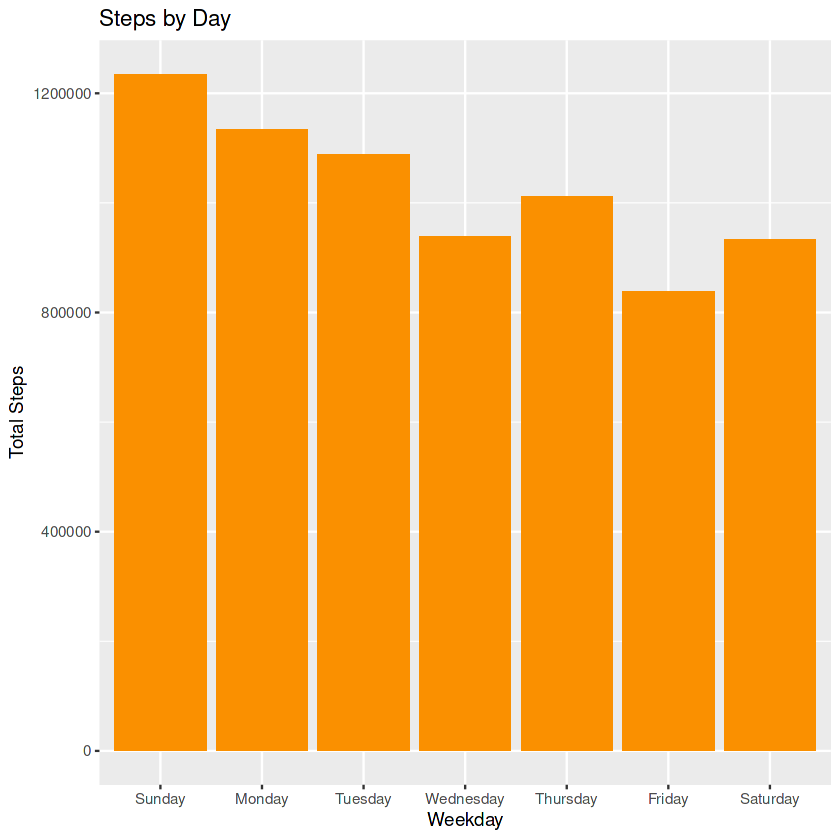

In [5]:
# Total Steps by Day Plot
ggplot(data=combined_data, aes(x=Weekday, y=TotalSteps)) + 
  geom_bar(stat="identity", fill="#fa9000") +
  labs(title="Steps by Day", y="Total Steps")

The data shows that users recorded the highest step count on Sundays and the lowest on Fridays. Given the overall high step counts, the marketing team can infer that the step tracking feature is highly valued in health fitness devices. This suggests that this feature would be beneficial for Bellabeat customers.


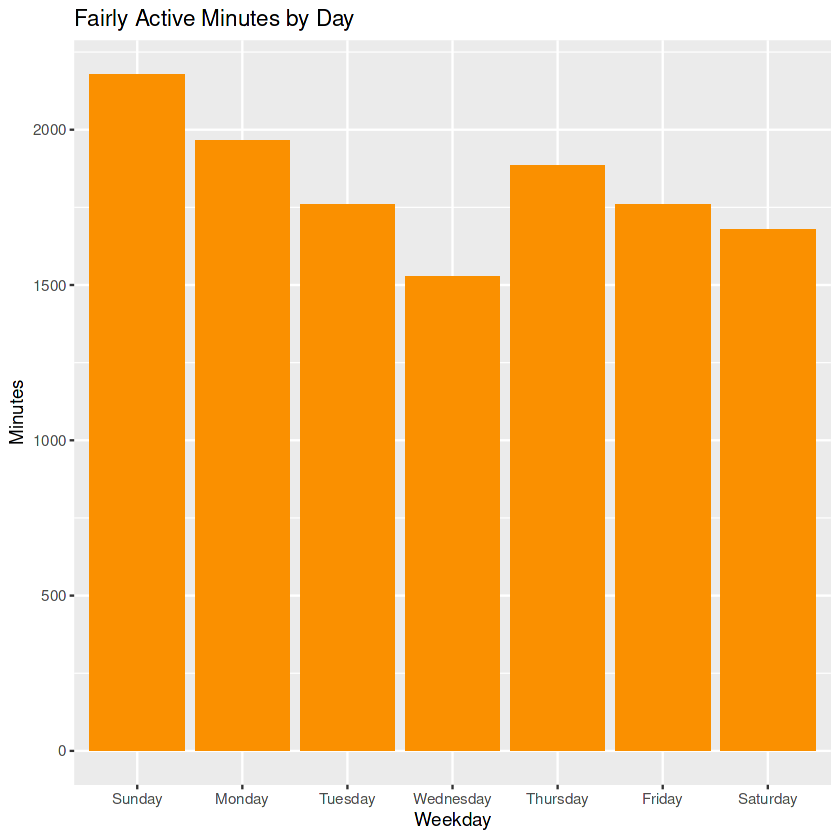

In [6]:
# Minutes of Moderate Activity per Day Plot
ggplot(data=combined_data, aes(x=Weekday, y=FairlyActiveMinutes)) + 
  geom_bar(stat="identity", fill="#fa9000") +
  labs(title="Fairly Active Minutes by Day", y="Minutes")

Interestingly, there was a noticeable dip in moderate activity levels on Wednesdays, with a rebound on Thursdays. This pattern could be attributed to the mid-week slump, where people, returning to work on Mondays, might feel less motivated or more fatigued by Wednesday. Wednesday could also be a common day for taking breaks, leading to increased activity on Thursday.

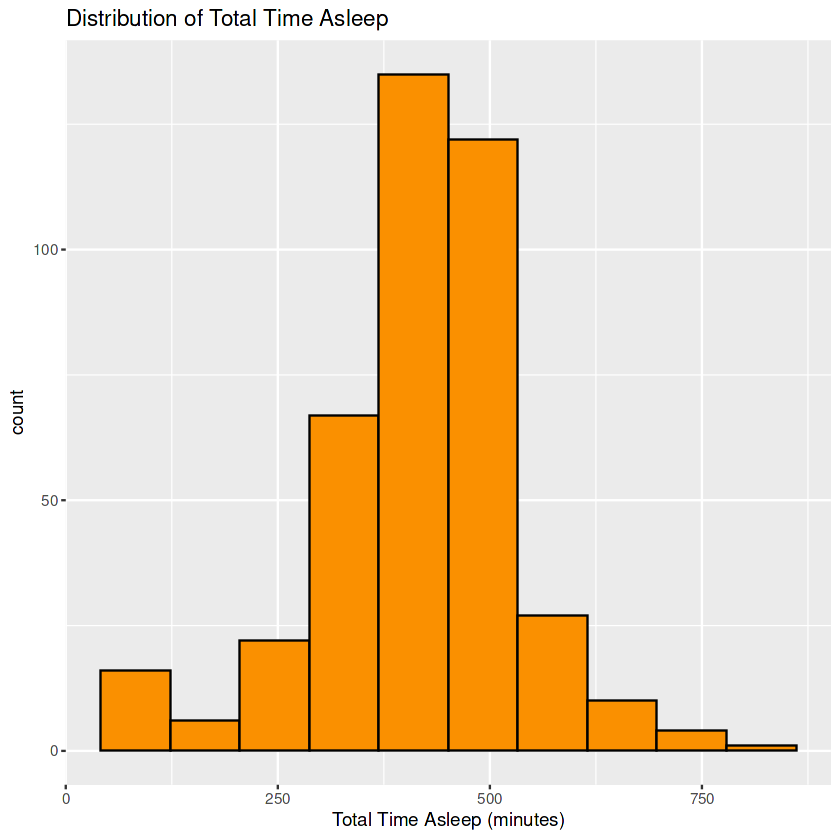

In [7]:
# Distribution of Sleep Time Plot
ggplot(combined_data, aes(TotalMinutesAsleep)) +
  geom_histogram(bins=10, na.rm=TRUE, color="#000000", fill="#fa9000") +
  labs(title="Distribution of Total Time Asleep", x="Total Time Asleep (minutes)")

According to the histogram, most people's sleep duration ranged from 312 to 563 minutes (5.2 to 9.4 hours), excluding the total time spent resting in bed.

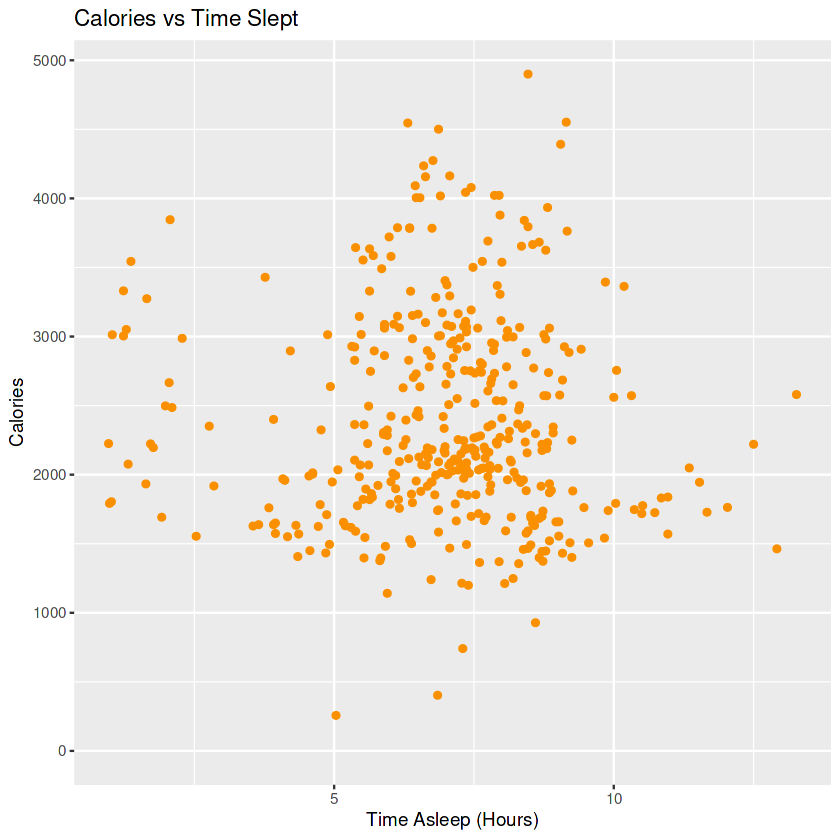

In [8]:
# Total Minutes Asleep vs Calories Plot
ggplot(combined_data) +
  geom_point(mapping=aes(x=TotalMinutesAsleep/60, y=Calories), na.rm=TRUE, color="#fa9000") +
  labs(title="Calories vs Time Slept", x="Time Asleep (Hours)", y="Calories")

Regarding calorie burn, aside from a few exceptions, individuals who slept between 5 and 7 hours tended to burn more calories. This finding is consistent with the observed 5.2 to 9.4 hours sleep range, suggesting a correlation between staying within this sleep range and higher calorie burn, particularly in the context of weight loss.

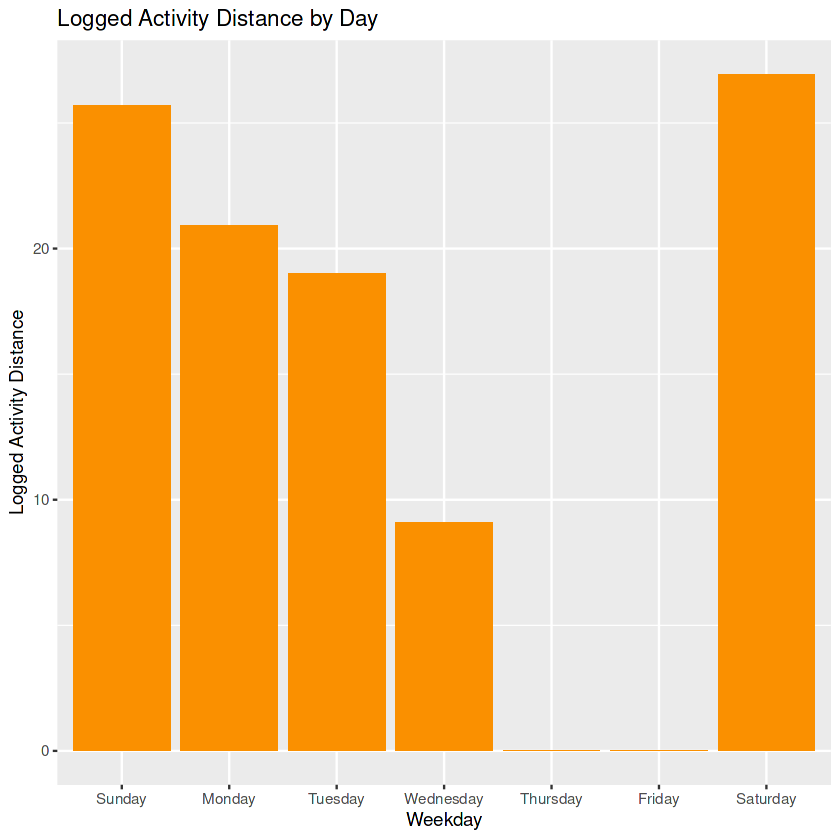

In [9]:
# Logged Activities Distance Plot
ggplot(data=combined_data, aes(x=Weekday, y=LoggedActivitiesDistance)) + 
  geom_bar(stat="identity", fill="#fa9000") +
  labs(title="Logged Activity Distance by Day", y="Logged Activity Distance")

The data indicated minimal use of the logged feature, evidenced by numerous missing entries and a complete lack of records for Thursday and Friday. The highest instances of logged distances were during weekends or times typically associated with leisure and the opportunity for more physical activity.

## Act
1. Users recorded the fewest steps on Fridays, possibly due to fatigue accumulating over the week. Recognising that this trend isn't exclusive to FitBit users, the marketing team might consider sending motivational messages on Thursday evenings and Friday and Saturday mornings to encourage users to maintain their physical activity.
2. The Logged Distance feature on FitBit devices was underutilised by many users, indicating a preference for automatic data collection. This insight suggests that Bellabeat's marketing team might opt not to include a manual activity distance logging function, as it appears to be less favored by users.
3. Regarding weight data entries, they were relatively scarce in comparison to the overall dataset size. Approximately two-thirds of the weight entries were made manually. This could imply that individuals not logging their weight might either not be focused on weight loss or lack the necessary device for automatic data recording. Given the limited use of both the logged weight and distance features, Bellabeat could consider promoting devices like smart scales that automatically capture and log weight data.